### Linear Regression from Scratch (No Scikit-Learn or Tensorflow)
If we consider a univariate case where $y$ is a function of only one variable $x$, the linear regression equation is:

\begin{equation}
    y = m\cdot x + b
\end{equation}

where $m$ and $b$, the parameters to be learned, are the gradient and the intercept of the line.

#### Loss function
The loss (difference between the actual and predicted values) is given by the mean squared error defined by the equation

$$E = \frac{1}{n} \cdot \sum_{i=0}^n (y_i - (m\cdot x_i + b))^2 $$

#### The Gradient (Direction of the steepest ascent)
Our goal when learning the values of the two parameters is to find the values that minimise the loss. We can begin to find these optimal values of $m$ and $b$ by calculating the partial derivatives of $E$ with respect to them.

$$\frac{\partial E}{\partial m} = -\frac{2}{n} \cdot \sum_{i=0}^n x_i (y_i - (m\cdot x_i + b))$$
$$\frac{\partial E}{\partial b} = -\frac{2}{n} \cdot \sum_{i=0}^n (y_i - (m\cdot x_i + b))$$

#### Updating parameters
These two partial derivatives are the directions of steepest ascent (increase) of the loss. We desire to learn the values of $m$ and $b$ that minimise the loss, which means we should be heading in the direction of steepest descent (opposite direction). So, in order to update them, we begin with their old values and gradually reduce them based on some learning rate $L$ (a value less than $1$) and the computed gradients.

$$m = m - L \cdot \frac{\partial E}{\partial m}$$
$$b = b - L \cdot \frac{\partial E}{\partial b}$$

The subtraction indicates that we are going in the **direction of steepest descent** i.e., opposite to that of the gradient.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

First, we shall create some dummy data whose gradient $m$ and intercept $b$ we know. We then add some Gaussian noise with zero mean and standard deviation of 1.5 to make it more random. We know that this dataset will still have a gradient $m\approx 2.2$ and intercept $b \approx 1.6$, but our objective is to learn these two parameters via **gradient descent**.

In [2]:
m = 2.2
b = 1.6
e = np.random.normal(0.0, 1.5, 200)
x = np.linspace(-3.127, 42.874, 200)
y = m * x + b + e

points = np.array(list(zip(x, y)))

In [3]:
def gradient_descent(current_m, current_b, points, learning_rate):
    '''
    Performs gradient descent using the training data
    @param current_m Current value of parameter 'm'
    '''
    # initialise the model parameters
    grad_m = 0
    grad_b = 0

    n = len(points)

    # update the gradients
    for i in range(n):
        x = points[i, 0]
        y = points[i, 1]

        grad_m += -(2/n) * x * (y - (current_m * x + current_b))
        grad_b += -(2/n) * (y - (current_m * x + current_b))

    m = current_m - learning_rate * grad_m
    b = current_b - learning_rate * grad_b

    return m, b

def fit(points, epochs, learning_rate):
    m = 0
    b = 0
    
    for i in range(epochs):
        if i % 1000 == 0:
            print(f"Epoch {i}, m = {m}, b = {b}")
        m, b = gradient_descent(m, b, points, learning_rate)

    print(f"Final parameters: m={round(m, 4)}  b={round(b, 4)}")
    return m, b

In [4]:
epochs = 10000
learning_rate = 0.001
m, b = fit(points, epochs, learning_rate)

Epoch 0, m = 0, b = 0
Epoch 1000, m = 2.2253075084922225, b = 0.8082498365647003
Epoch 2000, m = 2.211693148219737, b = 1.2006188312598758
Epoch 3000, m = 2.2043771188831225, b = 1.4114684796101686
Epoch 4000, m = 2.20044566090912, b = 1.5247740027542225
Epoch 5000, m = 2.1983329900749573, b = 1.5856616621617363
Epoch 6000, m = 2.197197691648003, b = 1.6183812239734965
Epoch 7000, m = 2.1965876096146815, b = 1.6359639285078935
Epoch 8000, m = 2.196259766222543, b = 1.645412450481464
Epoch 9000, m = 2.196083591079041, b = 1.6504898586418748
Final parameters: m=2.196  b=1.6532


We now proceed to visualise the regression line formed by gradient descent. As we can see, the line is an excellent fit for the data.

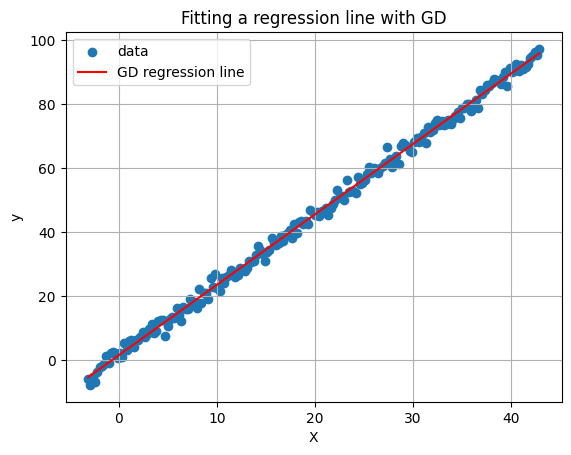

In [5]:
plt.grid()
plt.scatter(x, y, label='data')
plt.plot(x, [m*i + b for i in x], color='r', label='GD regression line')
plt.xlabel('X'), plt.ylabel('y'), plt.title('Fitting a regression line with GD'), plt.legend()
plt.show()

We can compare the parameters arrived at by our own implementation of gradient descent to those of Scikit-learn.

In [6]:
X = points[:, 0].reshape((200, -1))
y = points[:, 1].reshape((200, -1))

reg = LinearRegression().fit(X, y)
reg.coef_, reg.intercept_

(array([[2.19587895]]), array([1.65638769]))